In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('drive/MyDrive/MASTER/DATASCIENCE/PROYECTO/DATOS/Gasto_Medio_Diario_Persona_Prov.csv', sep=';', decimal=',')

In [6]:
df.head()

,FECHA,Provincia,Gasto_Medio_Diario
0,01/01/2018,Andalucía,102
1,02/01/2018,Andalucía,102
2,03/01/2018,Andalucía,102
3,04/01/2018,Andalucía,102
4,05/01/2018,Andalucía,102


In [7]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [8]:
df.set_index('FECHA').resample('W')

In [9]:
df.head()

,FECHA,Provincia,Gasto_Medio_Diario
0,2018-01-01,Andalucía,102
1,2018-01-02,Andalucía,102
2,2018-01-03,Andalucía,102
3,2018-01-04,Andalucía,102
4,2018-01-05,Andalucía,102


In [10]:
df = df.set_index('FECHA')
df.head()

,Provincia,Gasto_Medio_Diario
FECHA,,
2018-01-01,Andalucía,102
2018-01-02,Andalucía,102
2018-01-03,Andalucía,102
2018-01-04,Andalucía,102
2018-01-05,Andalucía,102


In [11]:
Valencia_df = df[df["Provincia"] == "Valencia"]


In [12]:
Valencia_df.head()

,Provincia,Gasto_Medio_Diario
FECHA,,
2018-01-01,Valencia,91
2018-01-02,Valencia,91
2018-01-03,Valencia,91
2018-01-04,Valencia,91
2018-01-05,Valencia,91


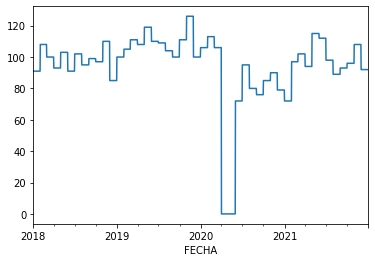

In [13]:
Valencia_df['Gasto_Medio_Diario'].plot()

In [14]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':Valencia_df.index,'y':Valencia_df.Gasto_Medio_Diario})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,91
2018-01-02,2018-01-02,91
2018-01-03,2018-01-03,91
2018-01-04,2018-01-04,91
2018-01-05,2018-01-05,91


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


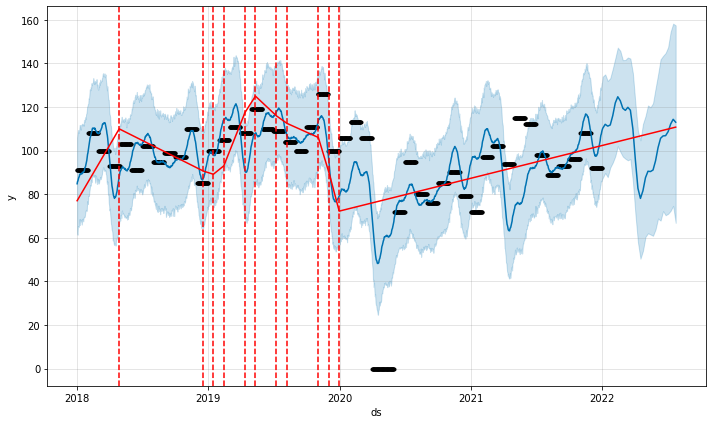

In [15]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [16]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,84.801825,62.397620,105.880789
1,2018-01-02,85.722801,61.386354,107.451565
2,2018-01-03,86.061531,65.385131,108.641841
3,2018-01-04,86.736024,65.177694,109.419391
4,2018-01-05,87.349729,64.914419,108.128990


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1486,2022-06-26,109.623124,70.364564,144.780330,79.794390,142.643277,-2.759984,-2.759984,-2.759984,-0.273526,-0.273526,-0.273526,-2.486458,-2.486458,-2.486458,0.0,0.0,0.0,106.863140
1487,2022-07-03,109.911348,71.003696,147.463089,78.094829,145.467088,-1.186691,-1.186691,-1.186691,-0.273526,-0.273526,-0.273526,-0.913165,-0.913165,-0.913165,0.0,0.0,0.0,108.724657
1488,2022-07-10,110.199573,72.399562,154.514963,76.466456,148.163489,1.988719,1.988719,1.988719,-0.273526,-0.273526,-0.273526,2.262245,2.262245,2.262245,0.0,0.0,0.0,112.188292
1489,2022-07-17,110.487798,74.653829,158.269158,74.743535,149.748496,3.887286,3.887286,3.887286,-0.273526,-0.273526,-0.273526,4.160812,4.160812,4.160812,0.0,0.0,0.0,114.375083
1490,2022-07-24,110.776022,66.834856,157.471481,72.594383,152.391347,2.263517,2.263517,2.263517,-0.273526,-0.273526,-0.273526,2.537044,2.537044,2.537044,0.0,0.0,0.0,113.039540


In [18]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('gasto_valencia.csv',  index=False, sep=";", decimal=",")